In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load data
with open('/data/SS_RNA_seq/Code/sparse_eq_class.dat', 'rb') as infile:
    X = pickle.load(infile)

print np.shape(X)

(3005, 342812)


In [247]:
# Load labels
truth_9 = np.loadtxt('/data/SS_RNA_seq/Code/clustering_on_reads/metadata/cell_group_num_3005.txt',dtype=str)
truth_47 = np.loadtxt('/data/SS_RNA_seq/Code/clustering_on_reads/metadata/cell_subclass_3005.txt',dtype=str)
truth_tissue = np.loadtxt('/data/SS_RNA_seq/Code/clustering_on_reads/metadata/cell_tissue_3005.txt',dtype=str)

In [8]:
len(truth_9)

3005

In [108]:
# Functions that are helpful for analysis

from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn import cluster
import sklearn.metrics
from sklearn.metrics.pairwise import pairwise_distances
from scipy.stats import entropy

# Normalize rows of X (such that each is a distribution)
def data_to_dist(X):
    s = np.sum(X,axis=1)
    X = X / s[:,None]
    return X

# obtain labels via kmeans
def jz_kmeans(X,k,num_iter=50):
    k_means = cluster.KMeans(n_clusters=k,max_iter=num_iter,precompute_distances=True)
    k_means.fit(X)
    labels = k_means.labels_
    return labels

# obtain labels via spectral clustering
def jz_spectral(X,k,D):
    # Compute pairwise distances
    #D = pairwise_distances(X,metric=dist_funct,n_jobs=nj)
    if D[1,1] < 1: D = np.exp(-D**2) # Convert distance to similarity matrix
    spectral = cluster.SpectralClustering(n_clusters=k,affinity='precomputed')
    spectral.fit(D)
    labels = spectral.labels_
    return labels,D

# NMF
def jz_NMF(X,n_topics=9):
    nmf = NMF(n_components=n_topics)
    nmf.fit(X)
    return nmf.components_

# obtain two major directions from t-SNE
def jz_tSNE(X):
    tsne = manifold.TSNE(n_components=2, random_state=0);
    X_tsne = tsne.fit_transform(X);
    return X_tsne

# Distance metrics (input: X with m samples, output: m-by-m distance matrix)
def shannon_jensen(p, q):
#    pshape=np.shape(p)
#    qshape=np.shape(q)
#    assert pshape[1]==1
#    assert qshape[1]==1
#    assert pshape[0]==qshape[0]
#    assert min(p) >= 0
#    assert min(q) >= 0
#    assert sum(p)<=1 + np.finfo(float).eps and sum(p) >= 1- np.finfo(float).eps
#    assert sum(q)<=1 + np.finfo(float).eps and sum(q) >= 1- np.finfo(float).eps
    m=0.5*p+0.5*q
    p = np.transpose(p[p > 0])
    q = np.transpose(q[q > 0])
    m = np.transpose(m[m > 0])
    return np.sqrt(entropy(m)-0.5*entropy(q)-0.5*entropy(p))

# Plot function with colors corresponding to labels (first two columns of X)
def jz_plot(X,labels):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(15,10))
    for label in unique_labels:
        ind = np.squeeze(labels == label)
        plt.scatter(X[ind,0],X[ind,1],c=np.random.rand(3))
        
def plot_with_labels(X,labels):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(15,10))
    for label in unique_labels:
        ind = np.squeeze(labels == label)
        plt.scatter(X[0,ind],X[1,ind],c=np.random.rand(3))

In [305]:
# Generate random sparse matrix
p = np.random.exponential(1,[30,40])
p[p < np.median(p)] = 0
print np.shape(p)
s = np.sum(p,axis=1)
p = p / s[:,None]
p = csr_matrix(p)


(30, 40)


In [10]:
# Run t-SNE on original data.

X_tsne = jz_tSNE(X)

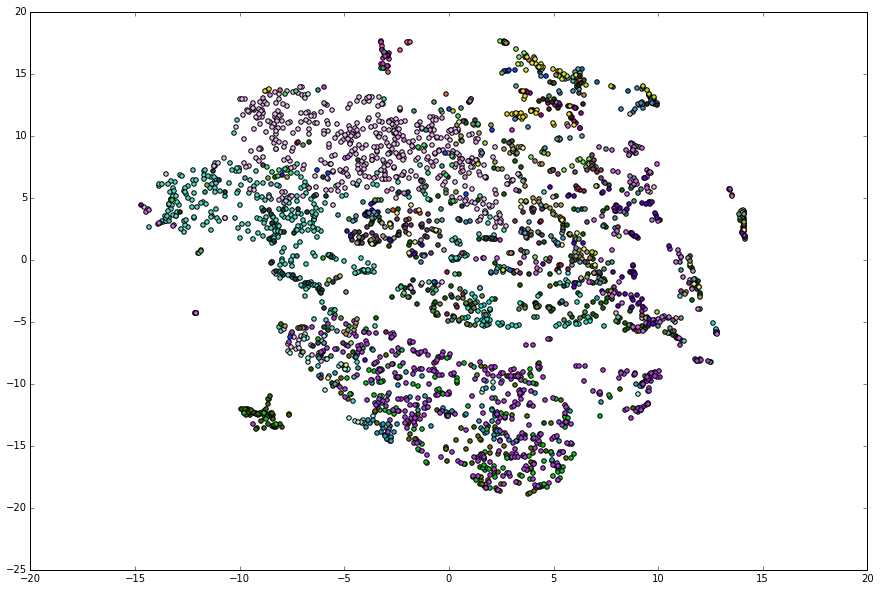

In [13]:
%matplotlib inline

#X_tsne = jz_tSNE(X)
#jz_plot(X_tsne,np.ones([np.shape(X_tsne)[0],1]))
#jz_plot(X_tsne,truth_9)
jz_plot(X_tsne,truth_47)
#jz_plot(X_tsne,truth_tissue)

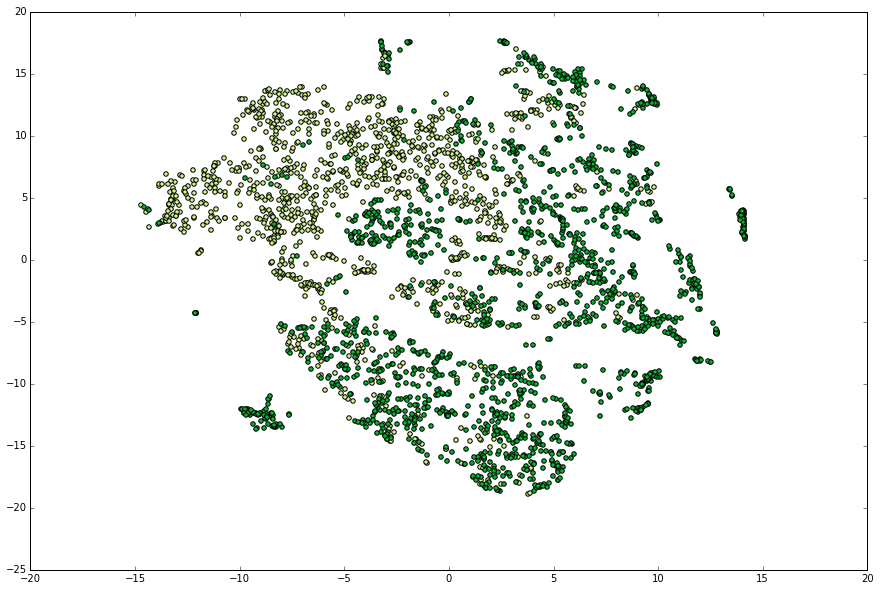

In [14]:
jz_plot(X_tsne,truth_tissue)

In [15]:
#k means for k=47
k = 47
labels47 = jz_kmeans(X,k)

KeyboardInterrupt: 

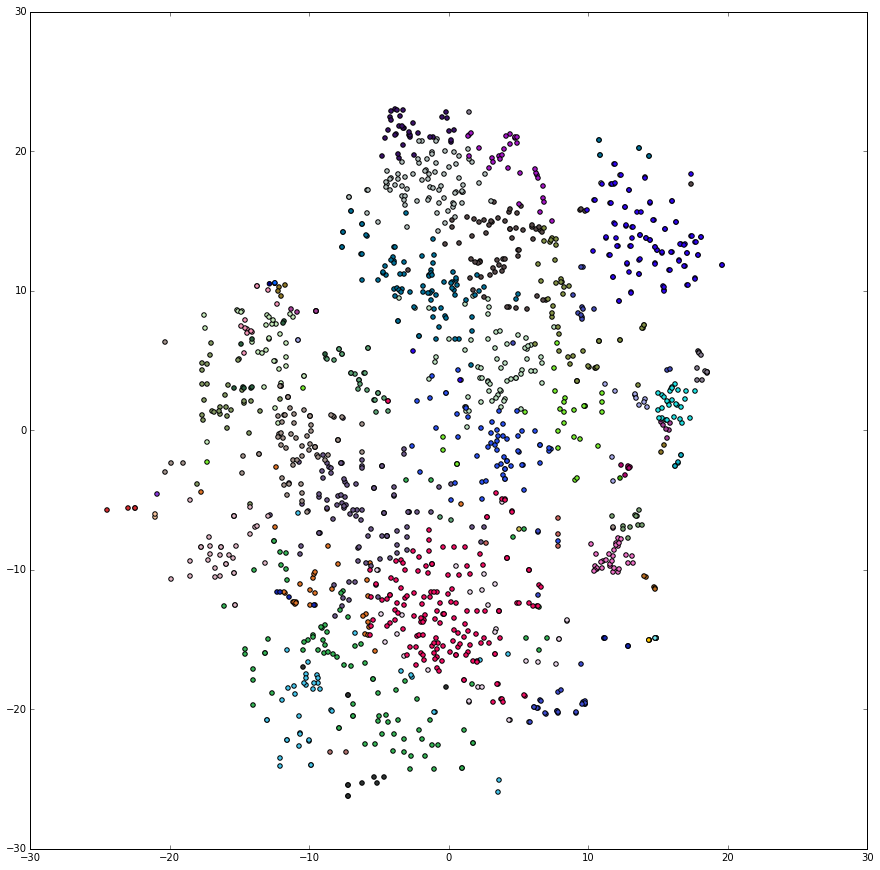

In [149]:
%matplotlib inline

# plot and color using kmeans labels
jz_plot(X_tsne,labels47)

In [347]:
#k means for k=4
k = 4
labels4 = jz_kmeans(X,k)

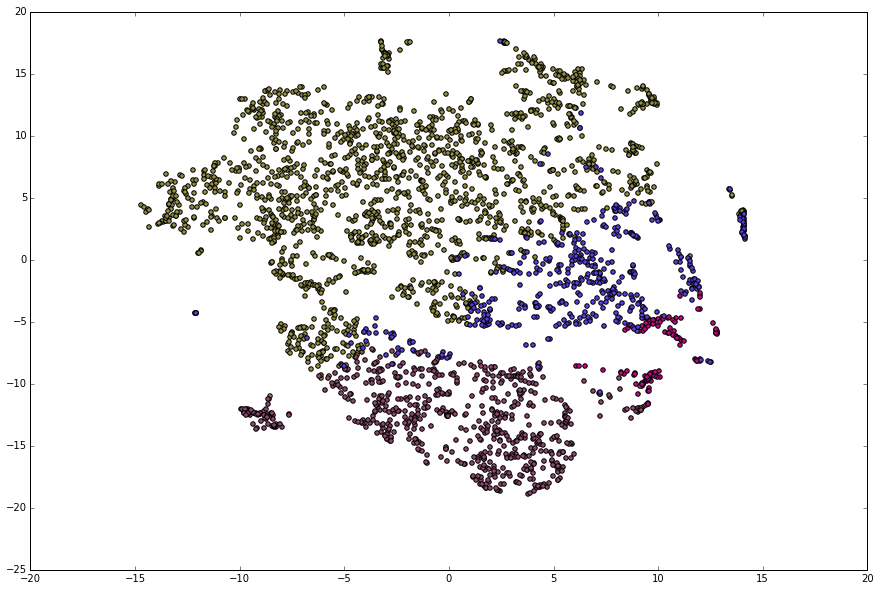

In [348]:
# plot and color using kmeans labels k=4


jz_plot(X_tsne,labels4)

In [349]:
#k means for k=9
k = 9
labels9 = jz_kmeans(X,k)

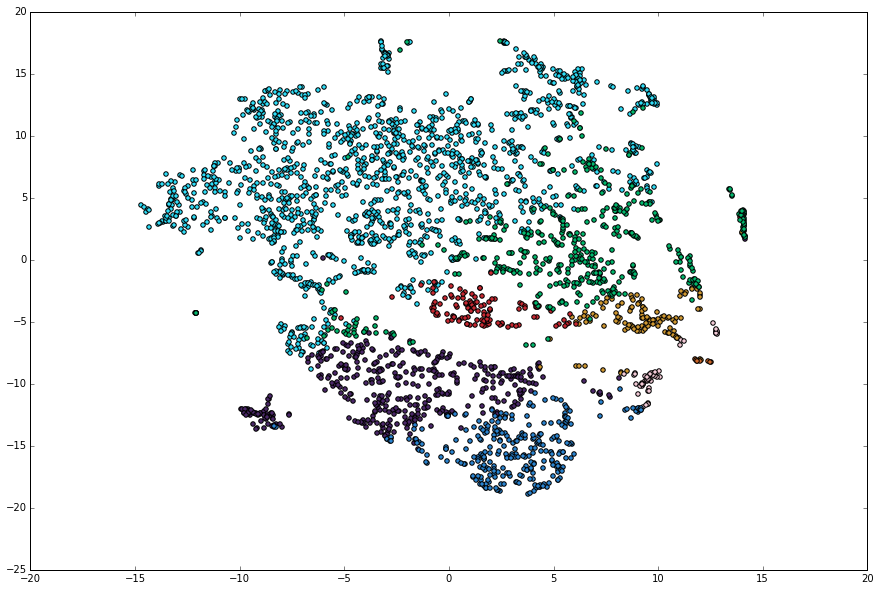

In [352]:
# plot and color using kmeans labels k=9


jz_plot(X_tsne,labels9)

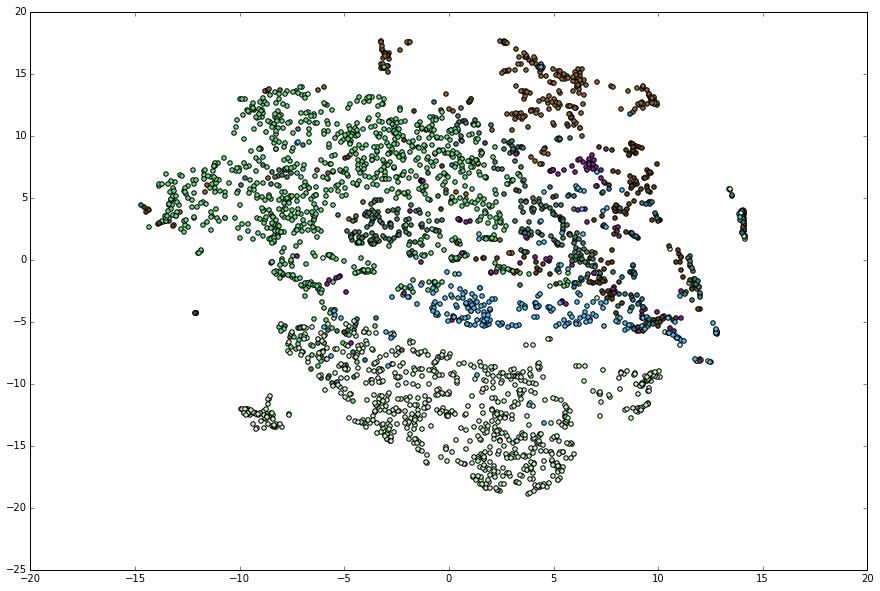

In [332]:
jz_plot(X_tsne,truth_9)

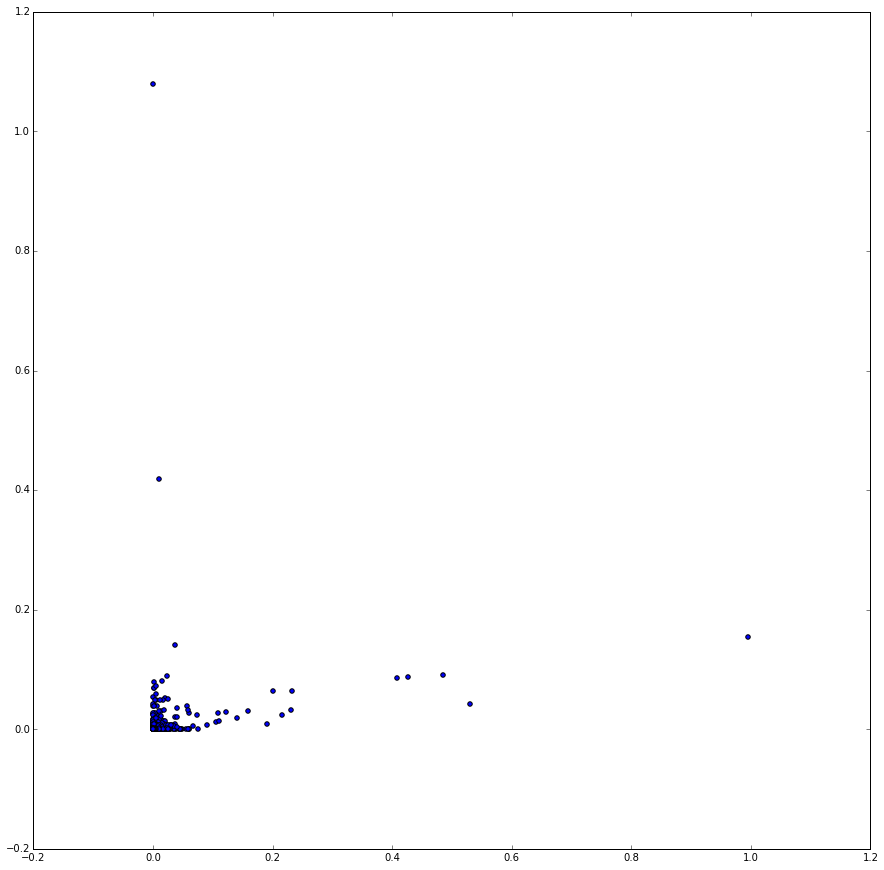

In [24]:
# NMF
%matplotlib inline


X_NMF = jz_NMF(X,n_topics=2)



plt.figure(figsize=(15,15))
plt.scatter(X_NMF[0],X_NMF[1])

In [92]:
from numpy.linalg import pinv
pinv_of_dict=pinv(X_NMF)

(342812, 2) (3005, 342812)


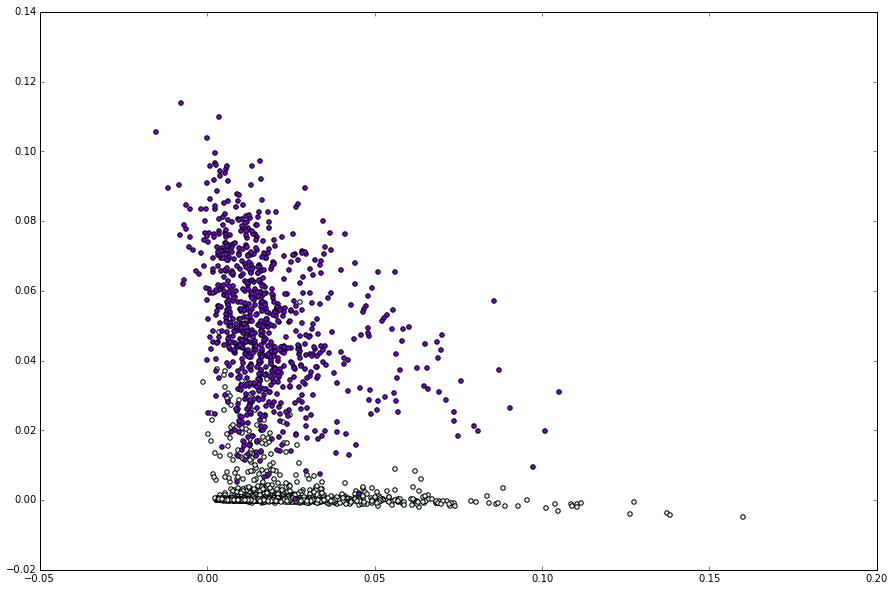

In [244]:
print pinv_of_dict.shape, X.shape
NMF_rep=np.transpose(pinv_of_dict)*np.transpose(X)

plot_with_labels(NMF_rep,temp_truth)


In [245]:
temp_truth=truth_9[:]
print truth_9[truth_9=='4'].size
temp_truth[temp_truth!='4']='0'
print temp_truth

820
['4' '4' '4' ..., '0' '0' '0']


In [87]:
X_NMF.shape

(2, 342812)

In [64]:
# generate spectral clustering labels (using jensen-shannon distance)

# plot and color using spectral clustering labels
labels,D_js = jz_spectral(X,47,shannon_jensen)
unique_labels = np.unique(labels)
plt.figure(figsize=(15,15))
for label in unique_labels:
    plt.scatter(X_tsne[labels == label,0],X_tsne[labels == label,1],c=np.random.rand(3))

KeyboardInterrupt: 

In [110]:
with open('/data/SS_RNA_seq/Code/pairwise_jensen_shannon_divergence.dat', 'rb') as infile:
    D = pickle.load(infile)

In [115]:
#Spectral clustering with Jensen-Shannon metric

labels_spectral, similarity_matrix=jz_spectral(X,9,D)

In [112]:
print labels_spectral

[1 1 1 ..., 0 0 0]


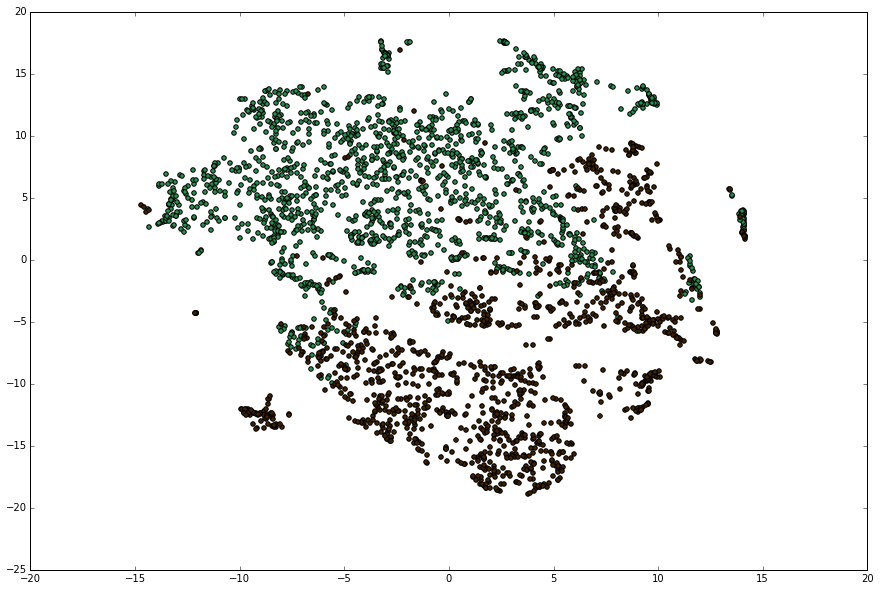

In [113]:
#plotting clusters with Jensen-Shannon metric

jz_plot(X_tsne,labels_spectral)

In [50]:
print np.shape(truth_tissue)
print np.shape(labels_spectral)
print labels_spectral[0]
print truth_tissue_num[0]

(3005,)
(3005,)
1
1


In [62]:
tt_tonum={'sscortex':1, 'ca1hippocampus':0}

truth_tissue_num=map (lambda x : tt_tonum[x], truth_tissue)

In [114]:
diff=map(lambda x,y: x-y, truth_tissue_num,labels_spectral)
print np.count_nonzero(diff)/float(3005)

0.270216306156


In [75]:
Dl1= pairwise_distances(X, Y=None, metric=sklearn.metrics.pairwise.manhattan_distances, n_jobs=64)

In [260]:
with open('/data/SS_RNA_seq/Code/pairwise_manhattan_distances.dat', 'wb') as outfile:
    pickle.dump(Dl1, outfile, pickle.HIGHEST_PROTOCOL)

In [78]:
#Spectral clustering with l1 metric

labels_spectral_l1, similarity_matrix_l1=jz_spectral(X,2,Dl1)

In [83]:
tt_tonumc={'sscortex':0, 'ca1hippocampus':1}

truth_tissue_numc=map (lambda x : tt_tonumc[x], truth_tissue)

diff_l1=map(lambda x,y: x-y, truth_tissue_numc,labels_spectral_l1)
print np.count_nonzero(diff_l1)/float(3005)

0.269883527454


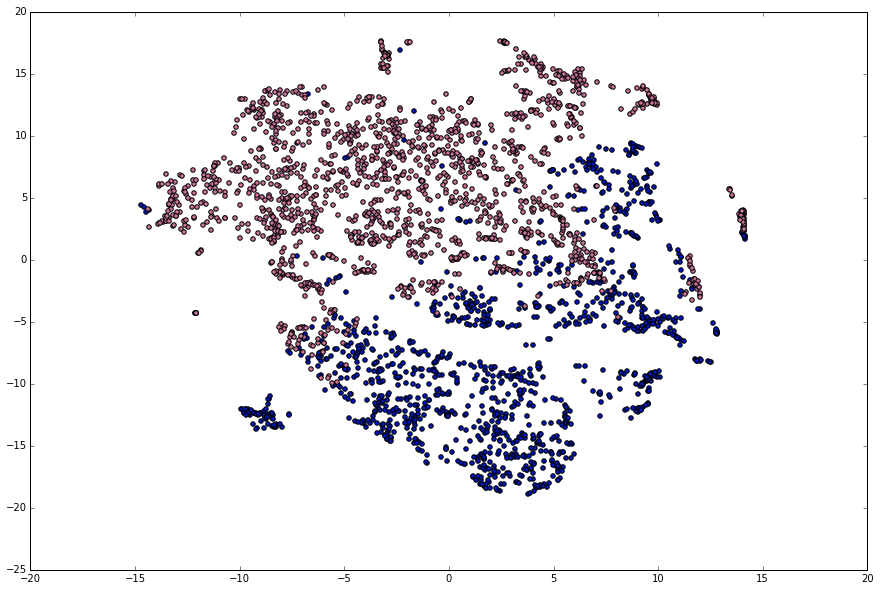

In [86]:
jz_plot(X_tsne,labels_spectral_l1)

In [214]:
import operator

def compare_labels(label1, label2):
    nplabel1=np.array(label1)
    nplabel2=np.array(label2)
    assert len(label1)==len(label2)
    unique_labels1=np.unique(nplabel1)
    unique_labels2=np.unique(nplabel2)
    
    num_entries1={}
    num_entries2={}
    
    for label in unique_labels1:
        num_entries1[label] = len(nplabel1[nplabel1==label])
    
    for label in unique_labels2:
        num_entries2[label] = len(nplabel2[nplabel2==label])
    
    
    sorted_label1 = sorted(num_entries1.items(), key=operator.itemgetter(1))
    sorted_label2 = sorted(num_entries2.items(), key=operator.itemgetter(1))
    
    difference=0
    for index in xrange(len(sorted_label1)):
         set1= set(np.flatnonzero(nplabel1==sorted_label1[index][0]))
         set2= set(np.flatnonzero(nplabel2==sorted_label2[index][0]))
         difference+=len(set1.symmetric_difference(set2))
    
    return difference/2

In [257]:
label1=['1','2','1','3','1']
label2=['2','2','2','3','1']
print compare_labels(truth_tissue,labels_spectral)
print label1[label1=='1']

truth_s4=np.zeros(truth_9.shape)
truth_s4[truth_9>='4']=1

print str(compare_labels(truth_s4,labels_spectral_l1)/float(3005)*100)+"%"

1548
1
2.16306156406%


In [254]:
print truth_9

['4' '4' '4' ..., '1' '3' '3']


In [259]:
labels_spectral_l1

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)